
*   Marketing is crucial for the growth and sustainability of any business
*   Marketers can help build the company's brand, engage customers, grow revenue, and increase sales.
*   In this case, you have been hired as a consultant to a bank in NY city. The bank has extensive data on their customers for the past 6 months. The marketing team at the bank wants to launch a targeted ad marketing campain by dividing their customers into at least 3 distinctive groups.





- Audience: bank management who wants to launch a campain.
- Objective: Perform customer market segmentation, basically segment the market into groups of customers that they have common features

ABOUT DATASET:

- CUST_ID: ID of Credit card Holder
- BALANCE: balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the balance is updated: 1: frequently updated, 0: not frequently updated
- PURCHASES: Amount of purchases made from accunt
- ONEOFF_PURCHASES: Max purchases amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchaser are being made, 1: frequently purchased, 0: not frequently purchased
- ONEOFF_PURCHASES_FREQUENCY: How frequently purchases are happening in one-go: requently purchased, 0: not frequently purchased
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done: 1: frequently done; 0: not frequently done
- CASH_ADVANCE_FREQUENCY: How frequently the cash advance being paid
- CASH_ADVANCE_TRX: Number of transactions made with "Cash in advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum payments made by usser
- PRC_FULL_PAYMENT: % of full payment paid by user
- TENURE: Tenure of credit card service for user

# Import Libraries and datasets

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
creditcard_df = pd.read_csv('gdrive/MyDrive/Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Mean balance is 1564
- Balance Frequency is frequenly updated on average ~0.9
- Purchase average is 1000
- One off purchase average is 600
- Average purhcases frequency is around 0.5
- Average oneoff_purhcases_frequency, purchase_installments_frequency, and cash_advance_frequency are generally low
- Average credit limit is 4500
- % of full payment is 15%
- Average tenture is 11 years


In [17]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [18]:
# Let's see who made one off purchase of $40761
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.250000 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


It seems like for this customer, he/she makes a lot of frequent purchases, and she/he makes a lot of one off purchases as well. But she/he doesnt use cash advance. So it doenst make sense to this kind of customer and launch a target marketing campain about cash advance and email them because they wont use cash advance. But when it comes to purchases transactions, this customer makes 101 transactions which is  alot. The credit limit is 22,500 and payment this customer made is 46,930. In general this customer pays full amount around 25% rate and the tenture is 10 years.

In [19]:
# let's see who take max cash advance
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [20]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


The balance for this customer is around 10,905. But this customer seems to do a lot of cash advances. The cash advances is 47,137 and the cash advance frequency is 1 which is 100%. When we compare with the customer with max one-off purchase, we can see clear difference.

CLEANING DATASET

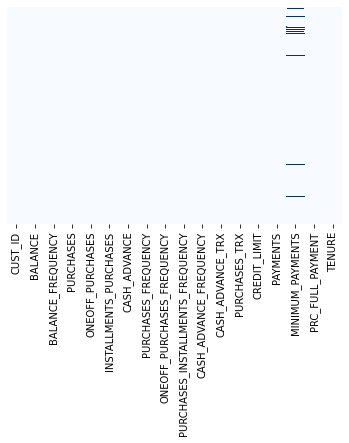

In [23]:
#let's see if we have any missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [24]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

To fill for missing values of credit limit and minimum payment columns, we can replace by average of these columns

In [25]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [26]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [27]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

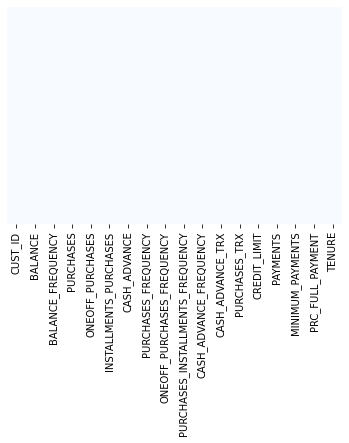

In [28]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [29]:
#let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [30]:
#let's drop customer ID 
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [31]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
#check len of dataset
n = len(creditcard_df.columns)
n

17

In [33]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# VISUALIZE DATASET

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

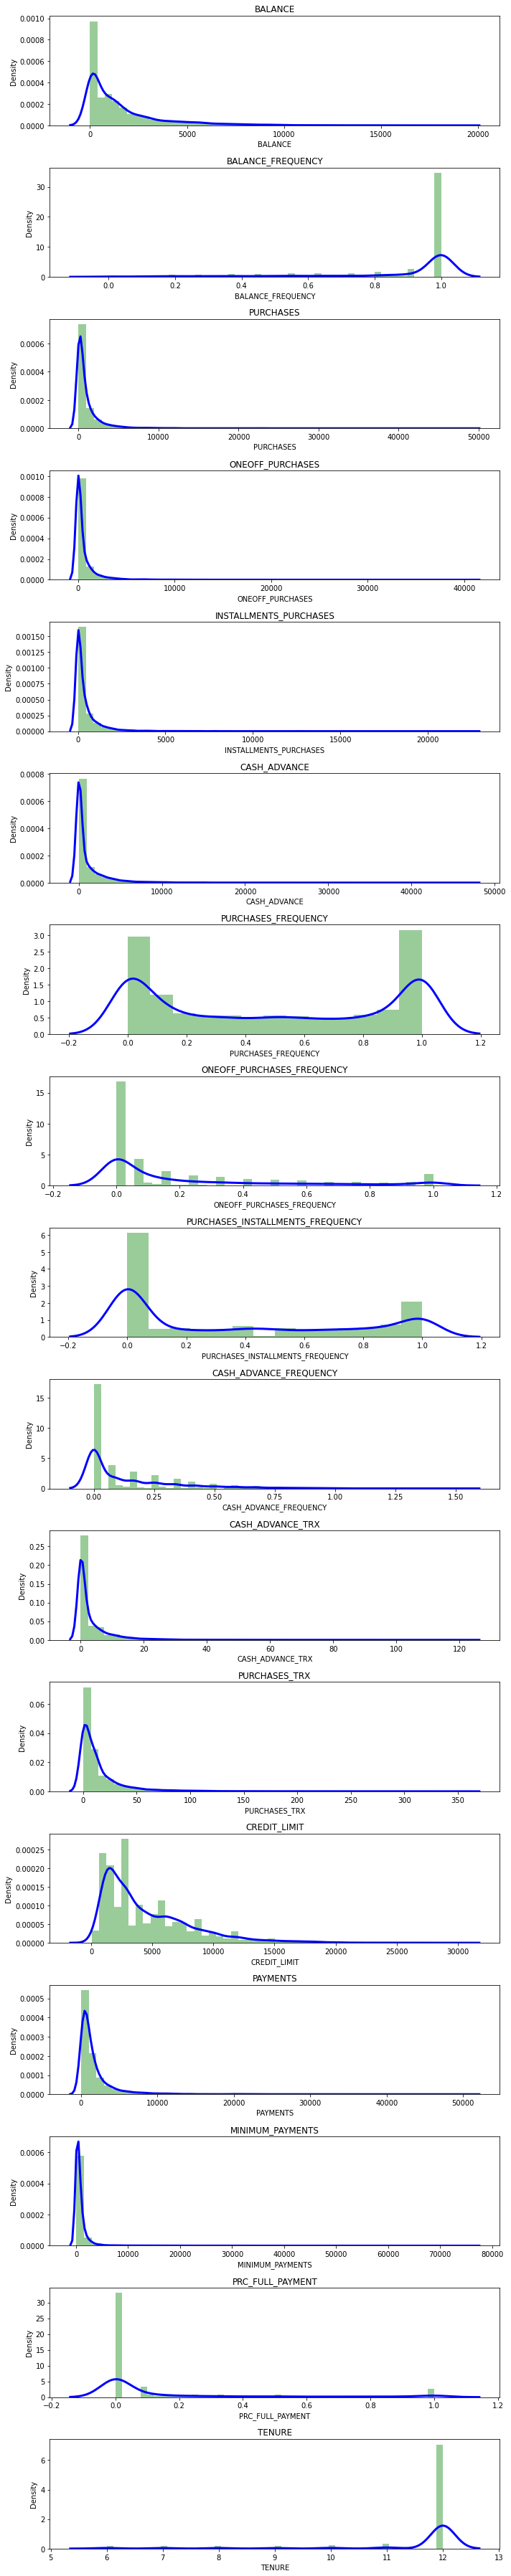

In [39]:
#displot combines the matplotlib.hist function with seaborn kdeplot()
#KDE plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable
# KDE demonstrates the probability density at different values in a continous variable.

plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws = {'color': 'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

- For the balance, most of customers are around 1500 range.
- For Balance frequency, a lot of customers are actually around 1, which means they use their credit card frequently. they update their balance frequently for the purchases.
- For the purchases, the average purchases are around 1000.
- For the purchase_frequency, we have kind of 2 clusters of customers. One of them doesnt do and use the purchase frequency and the other group use it pretty frequently.
- For one-off purchase frequency, not a lot of users do this it seems. There are a lot of zeros.It is same as well for the cash advance frequency.
- For full payment, there is a very small value of the small number of customers who pay credit card in full, and most of them actually dont pay it in full.
- Most of customers are around 1-12 years. we have a lot of old customers

In [40]:
#correlation between purhcases and oneoff_purchases and installment_purchases
#trend between purchases and credit_limit and payment
correlations = creditcard_df.corr()


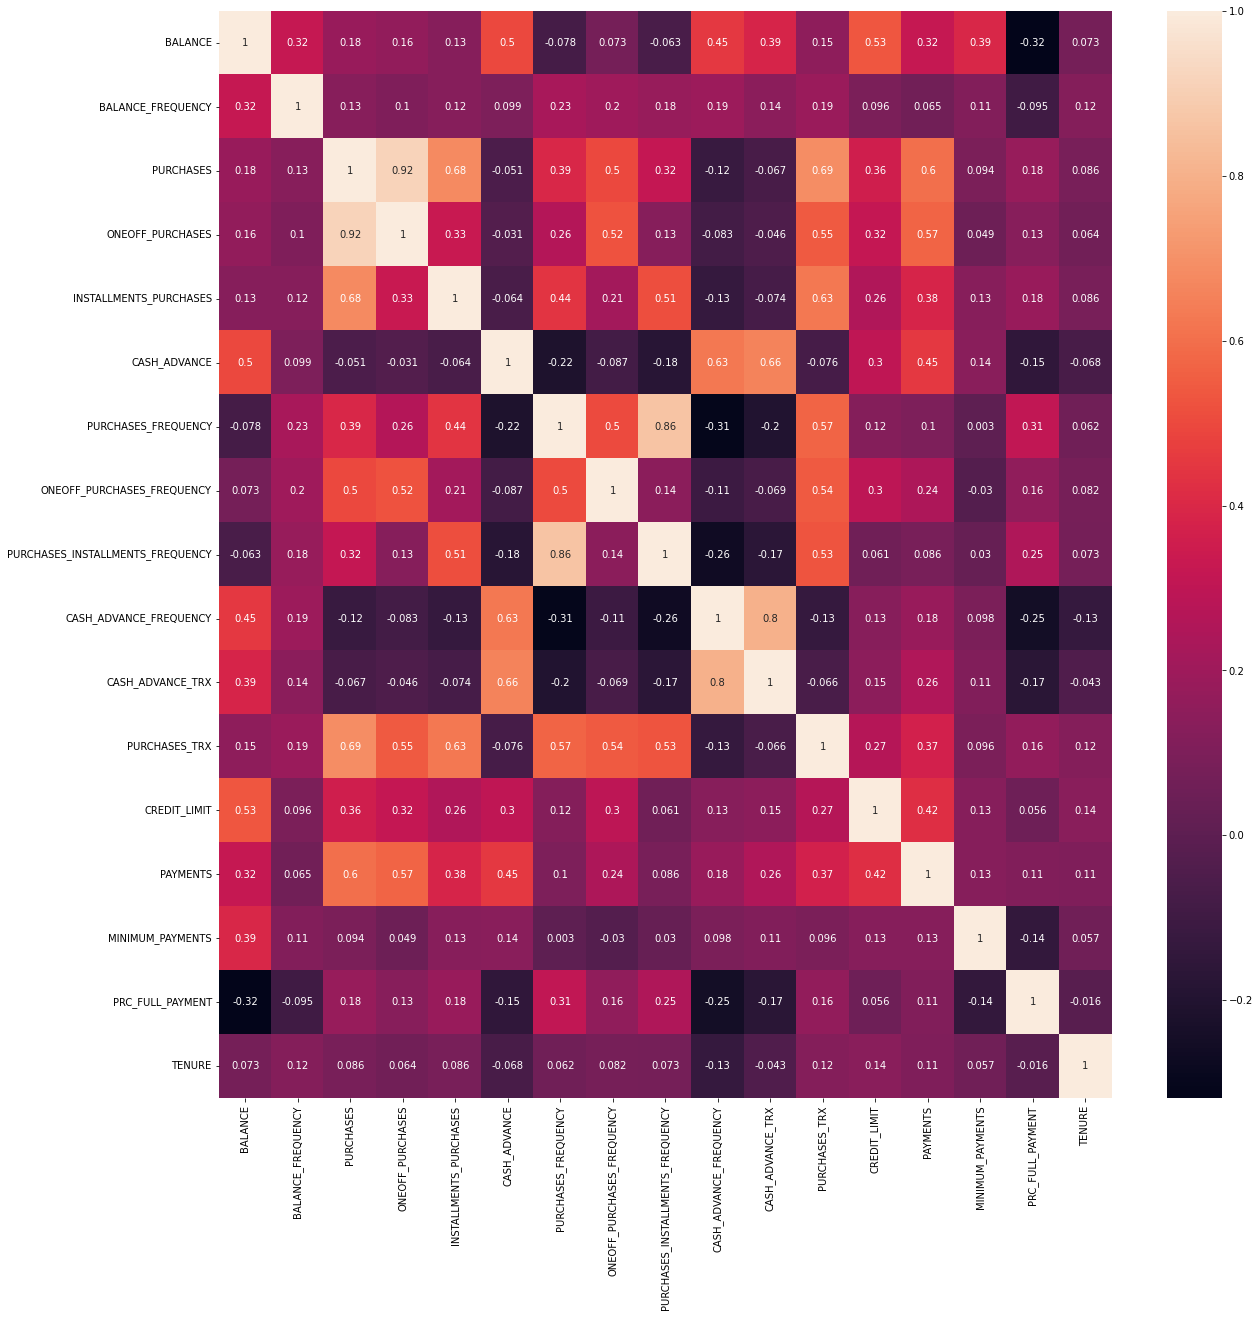

In [42]:
f,ax = plt.subplots(figsize = (20,20) )
sns.heatmap(correlations, annot = True)

- There is strong correlation between purchases and one-off purchase (corr = 0.92), means customers who do purchases, they do one off purchases as well which makes senses.
- There is a correlation between installment purchases and purchases
- There is a trong correlation between installment purchases and purchases frequency (0.86)

# K-MEANS AND FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- K-means is an unsupervised learning algorithm (clustering).
- K-means works by grouping some data points together (clustering) in an unsupervised fashion
- The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points

In [43]:
#let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled  = scaler.fit_transform(creditcard_df)

In [44]:
creditcard_df_scaled.shape

(8950, 17)

In [45]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [49]:
score_1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)

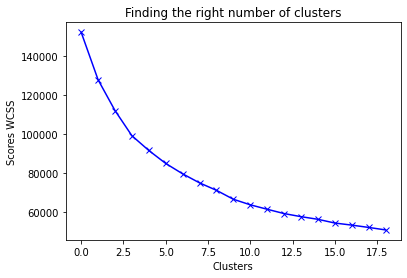

In [50]:
plt.plot(score_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel("Clusters")
plt.ylabel("Scores WCSS")
plt.show()

As we can see, the drop from 1 cluster to 2 and 3 are large. The slope of the line is large. However after we reach around 7.5 and so on, it seems that the errors are very minimal, or thw WCSS change is not much.
We can choose number of clusters to be 7.

In [51]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [52]:
labels

array([2, 5, 1, ..., 0, 0, 0], dtype=int32)

In [53]:
labels.shape

(8950,)

In [54]:
labels.max()

7

In [55]:
labels.min()

0

In [56]:
#concatenate the clusters labels to our original dataframe
creditcard_df_cluster =pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


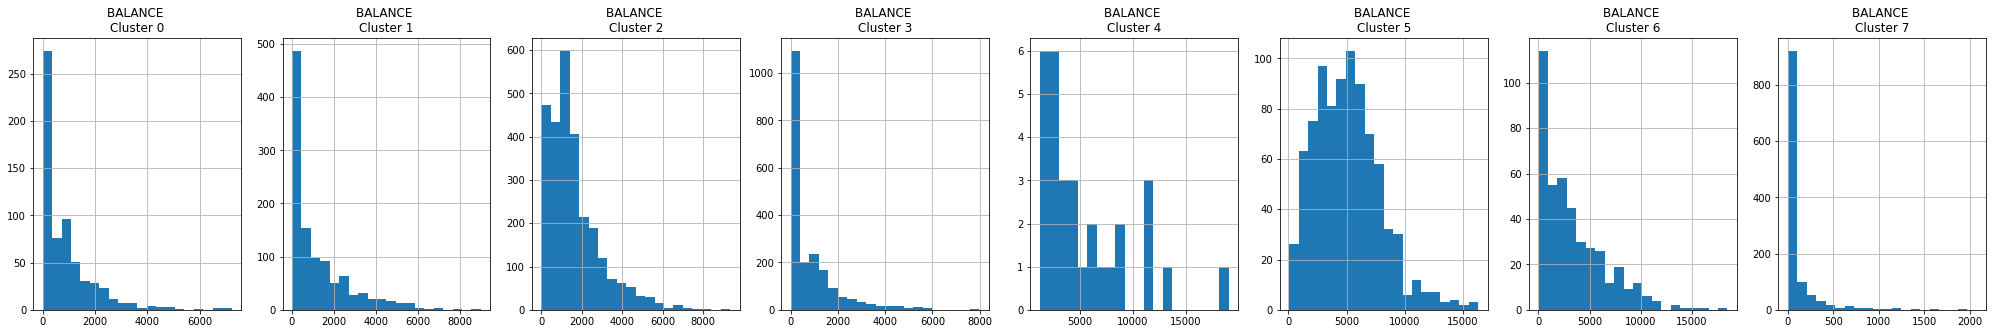

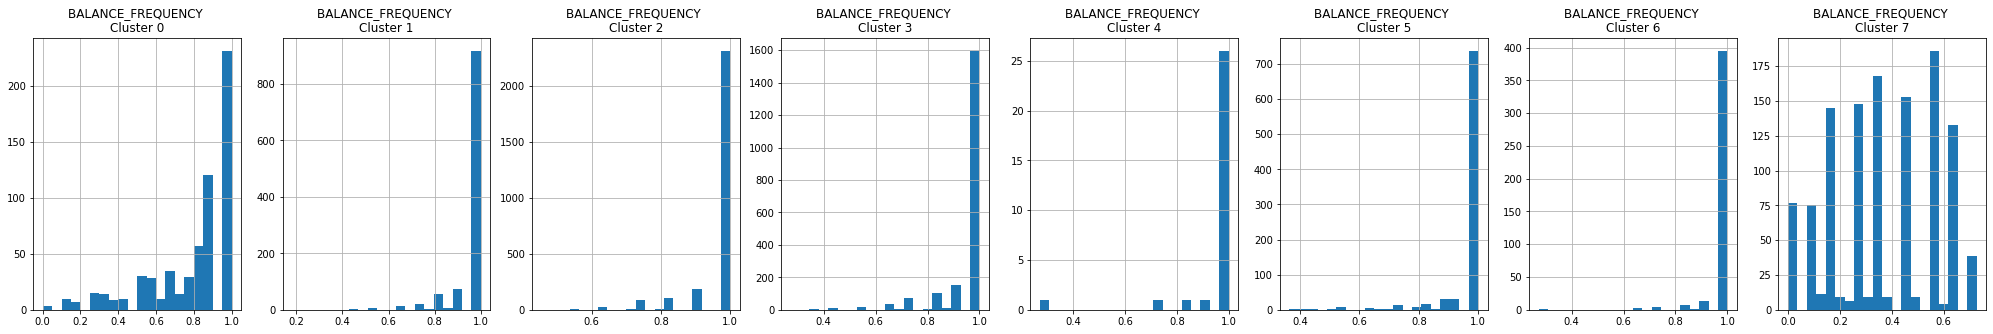

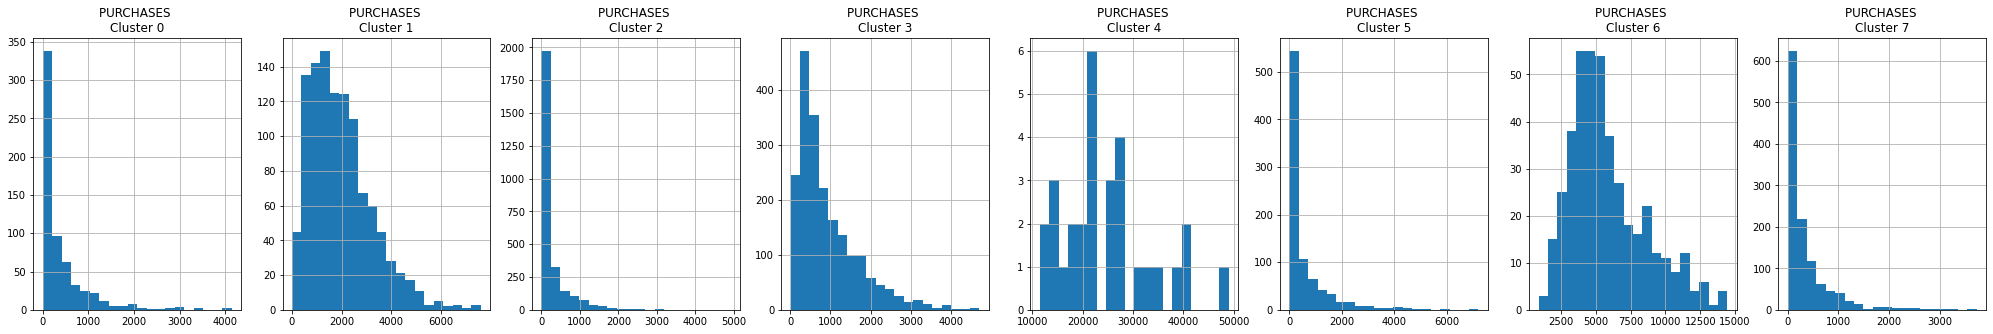

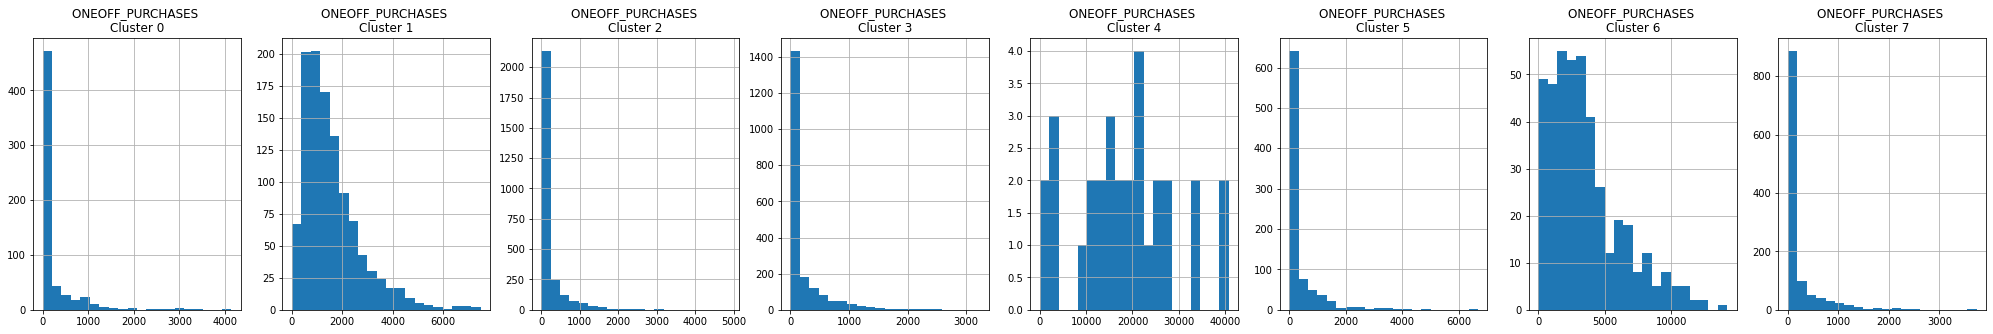

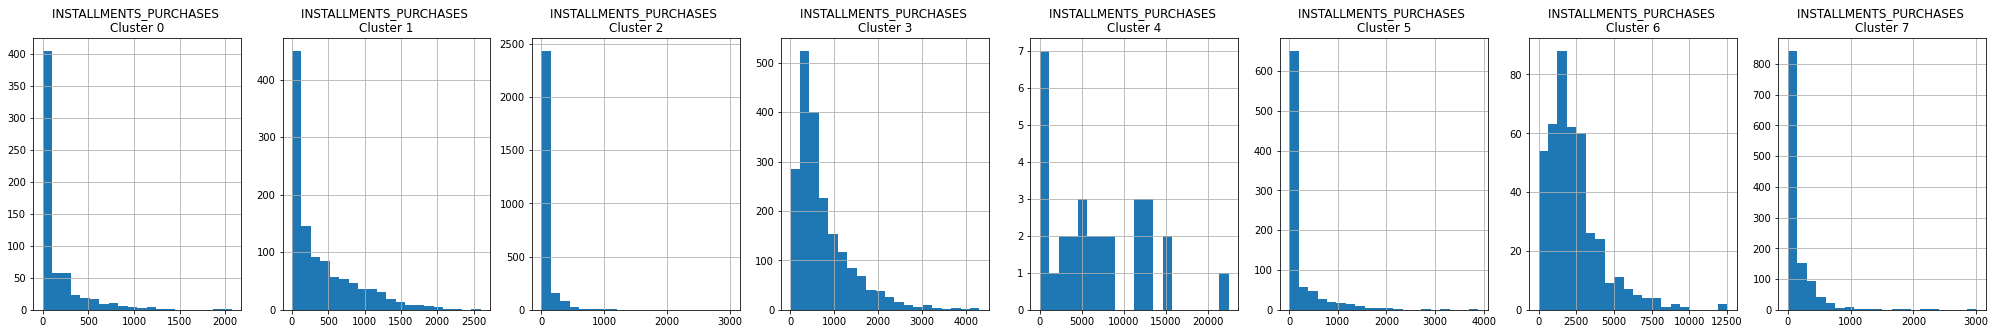

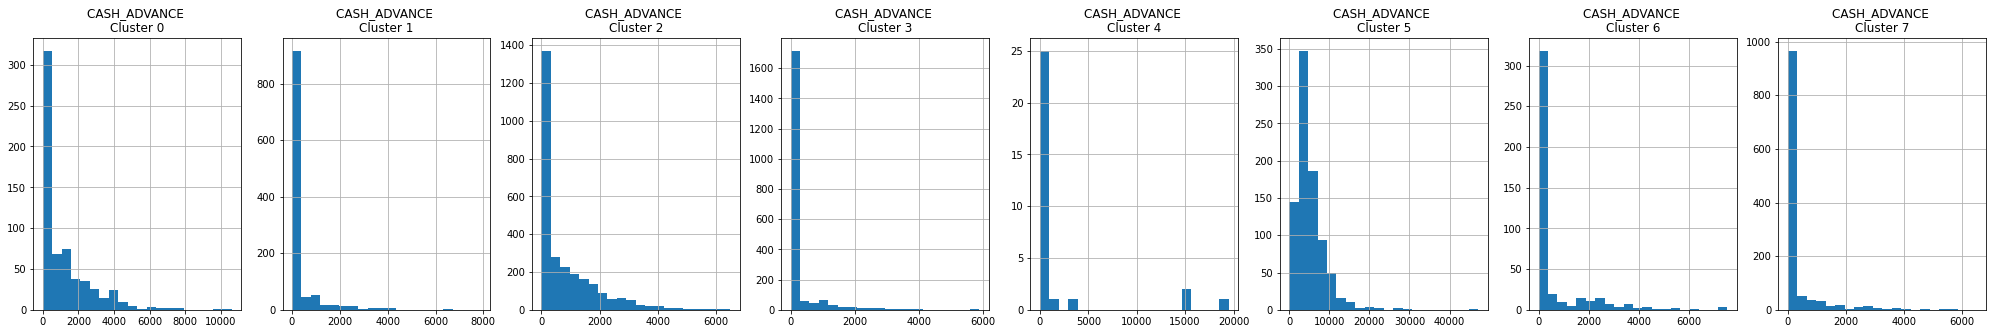

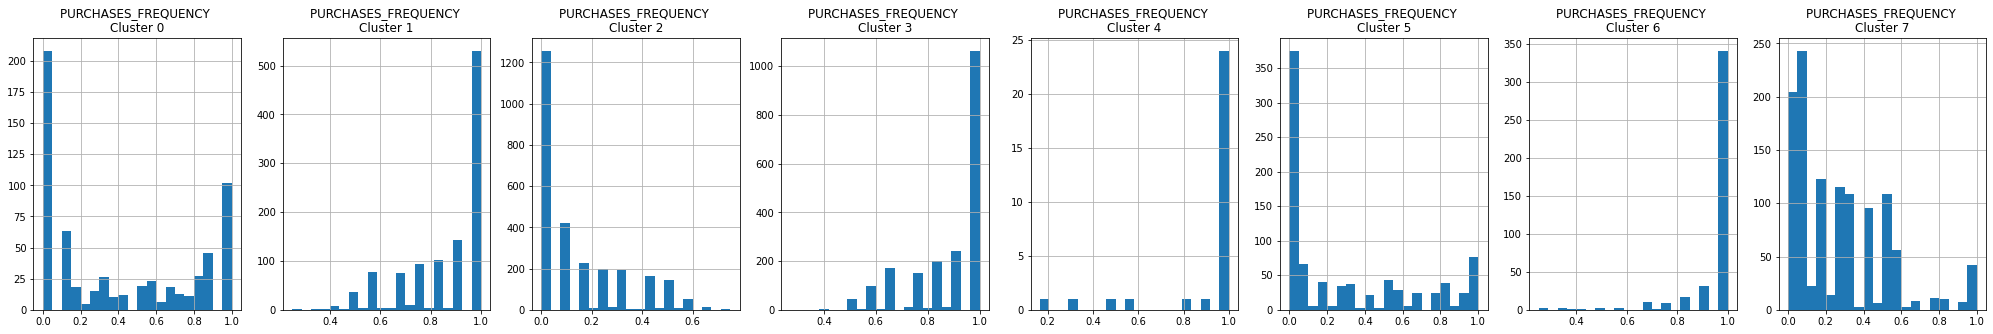

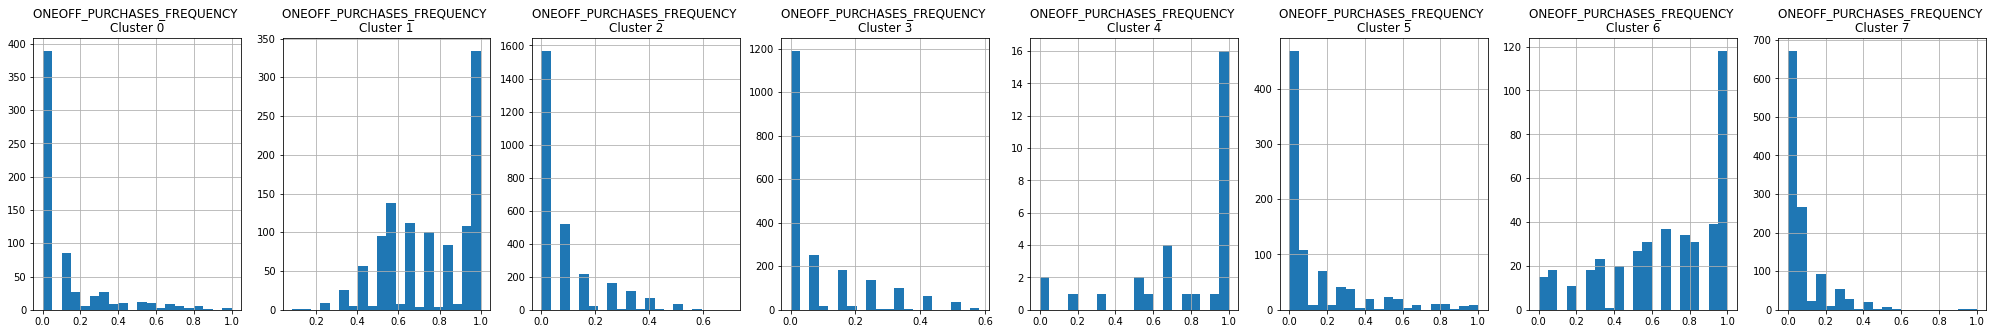

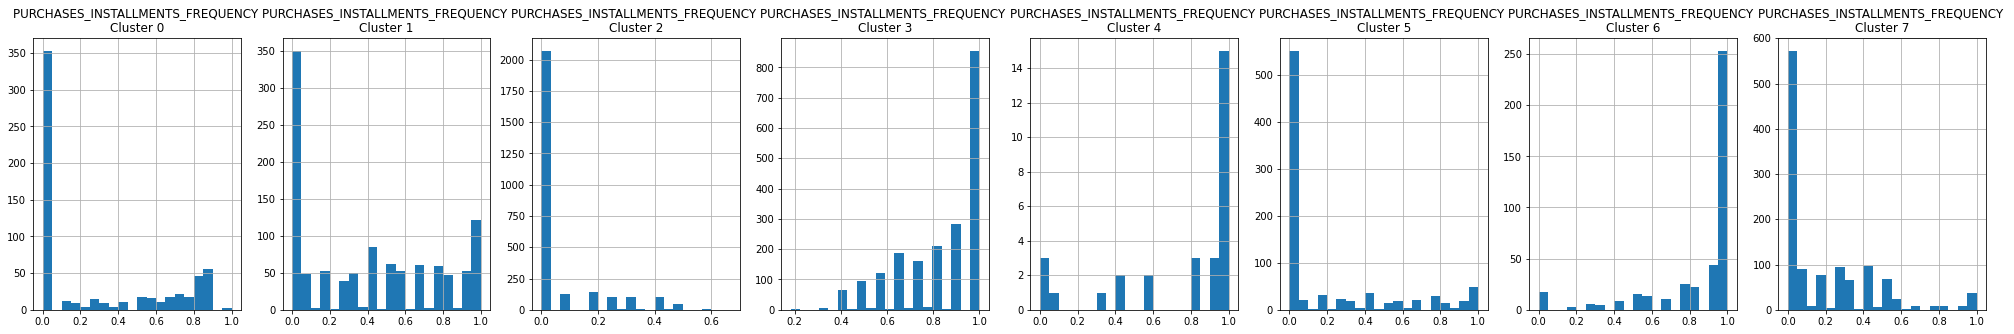

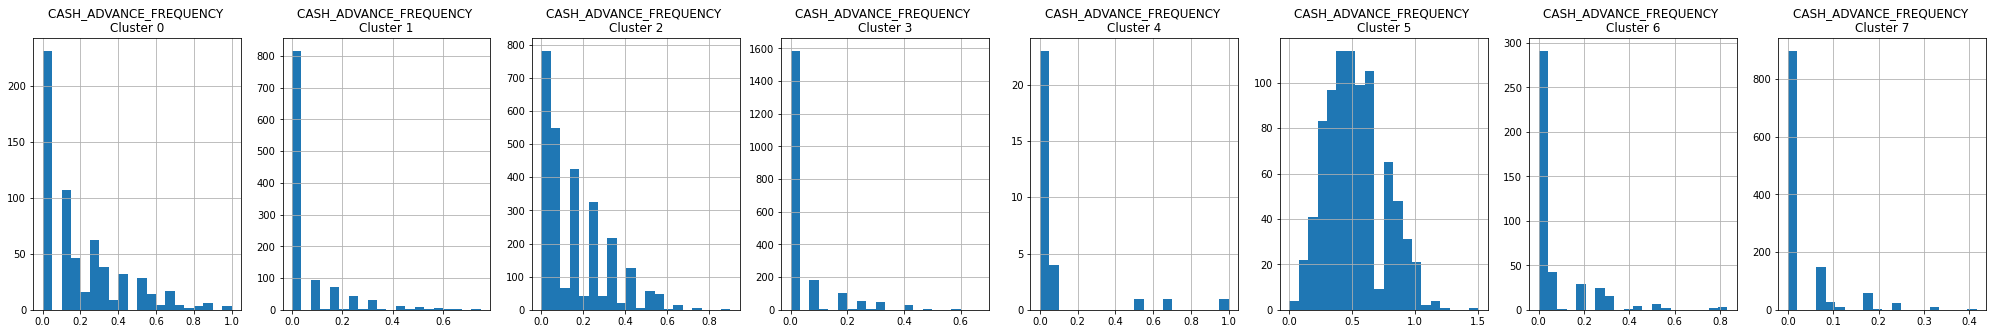

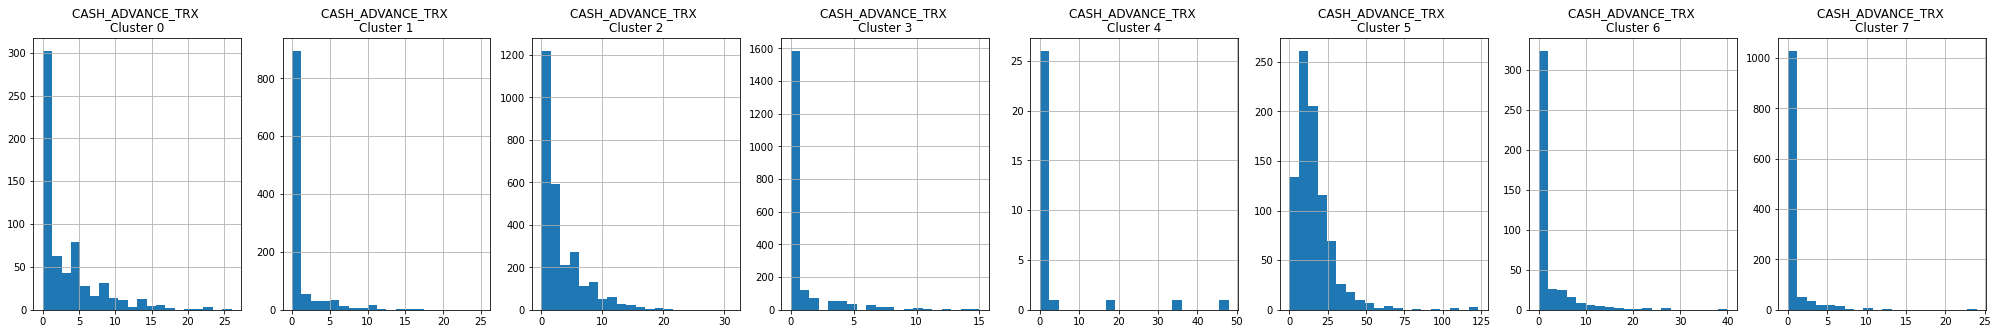

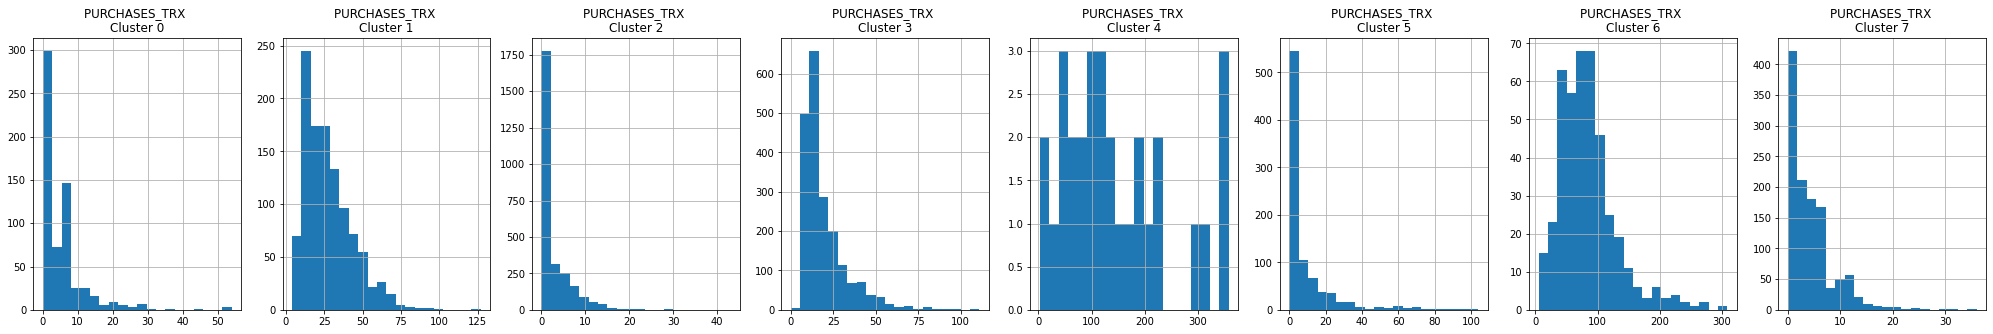

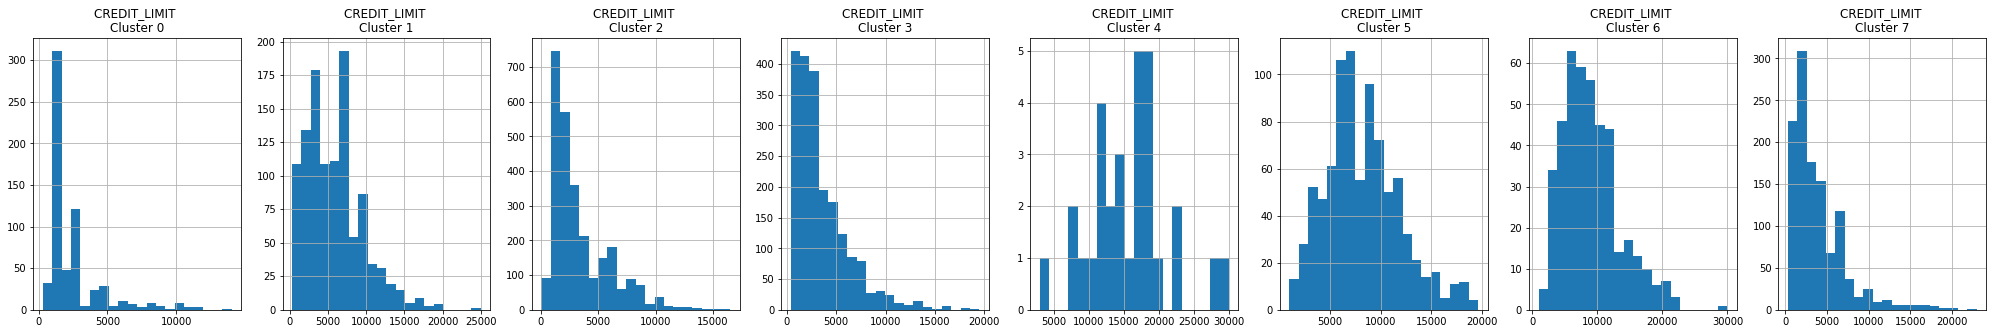

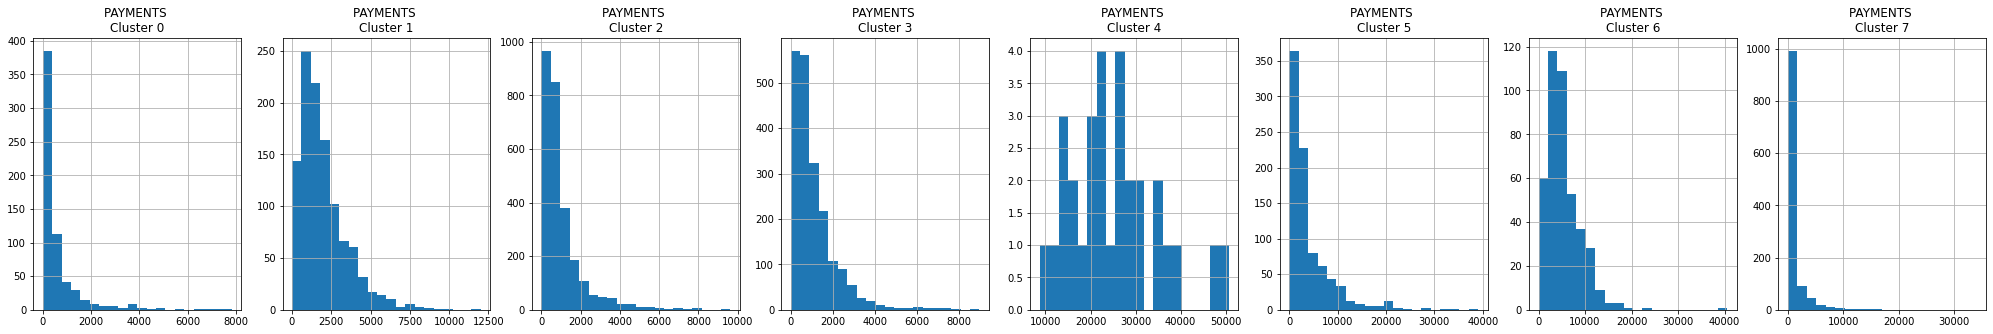

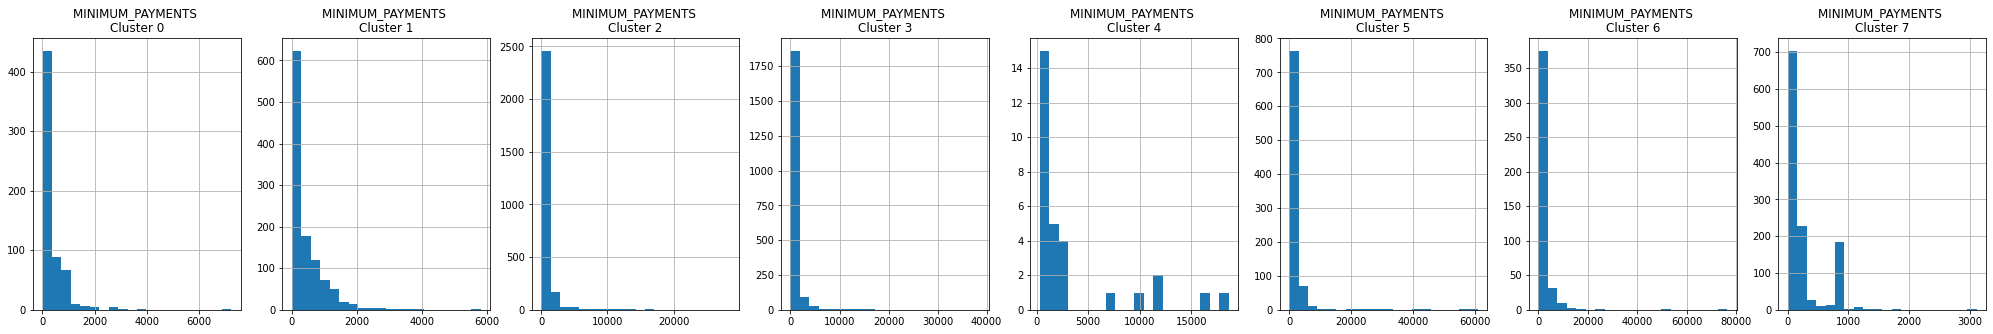

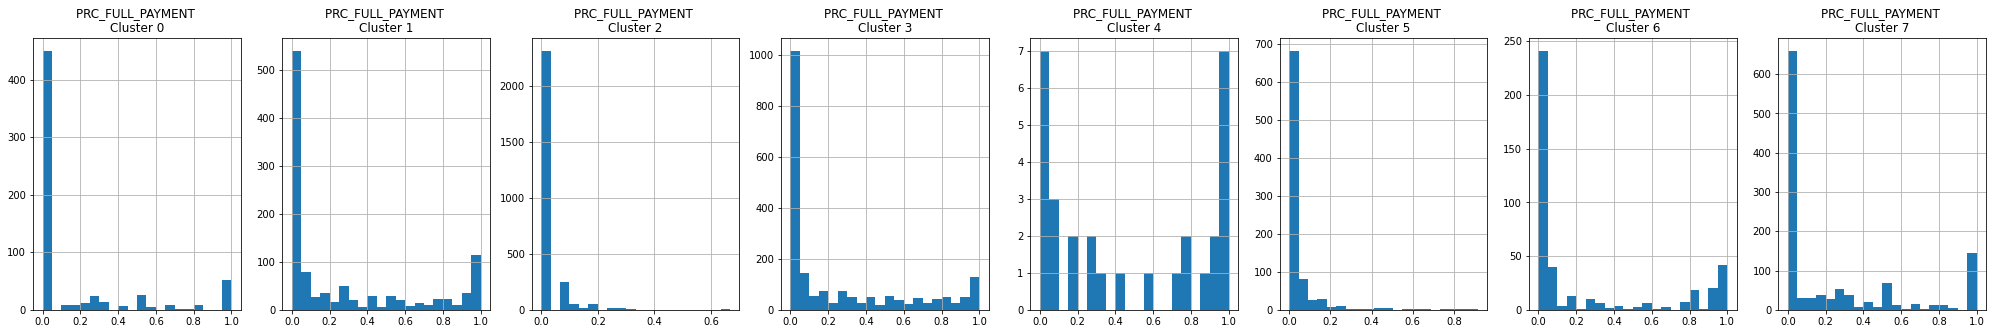

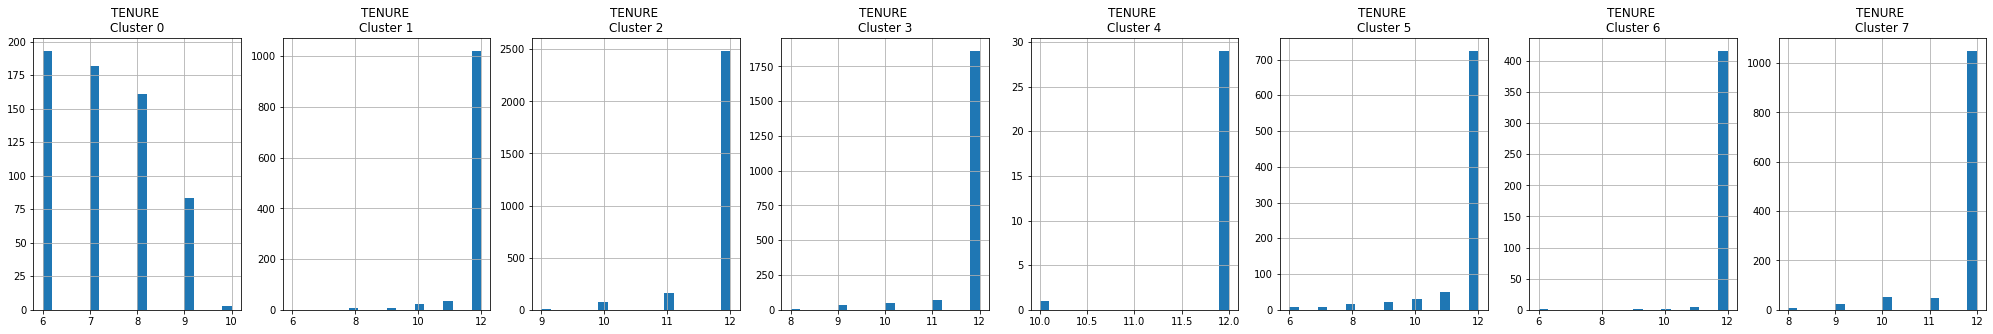

In [57]:
#plot the histogram of clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f"{i} \nCluster {j}")
plt.show()

We notice for cluster no 5, the balance is between 0 and 15000 mean while for other cluster it only goes up to 500. For the balance frequency, cluster no 5 has very high frequently which is almost 1. The value for cash advance is between 0 and 10000. For the purchase frequency it is actually not that high, it is almost 0. so these customers actually dont make a lot of purchases. However, when we go to cash advance transactions, we can see they are doing a lot of transaction between 0 and 50 compare to other groups of customers. Again for the cash advance frequency, there are a lot of values at 1 and 1.5, means they do a lot of cash advance transactions and a lot of frequency as well as much higher compare to other groups. It seems like this is unique group of customers for the bank to target.

# PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

- PCA is an unsupervised machine learning algorithm.
- PCA performs dimensionality reductions while attempting at keeping the original information unchanged
- PCA works by trying to find a new set of features called components.
- Components are composites of the uncorrelated given input features.

In [58]:
#Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221993, -1.07645666],
       [-1.1382969 ,  2.50647148],
       [ 0.9696749 , -0.38346085],
       ...,
       [-0.92620134, -1.81079659],
       [-2.33654553, -0.6579979 ],
       [-0.55642182, -0.40045871]])

In [59]:
#create a dataframe with the 2 components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.682220,-1.076457
1,-1.138297,2.506471
2,0.969675,-0.383461
3,-0.873629,0.043161
4,-1.599433,-0.688586
...,...,...
8945,-0.359628,-2.016152
8946,-0.564366,-1.639142
8947,-0.926201,-1.810797
8948,-2.336546,-0.657998


In [60]:
#concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076457,2
1,-1.138297,2.506471,5
2,0.969675,-0.383461,1
3,-0.873629,0.043161,2
4,-1.599433,-0.688586,2


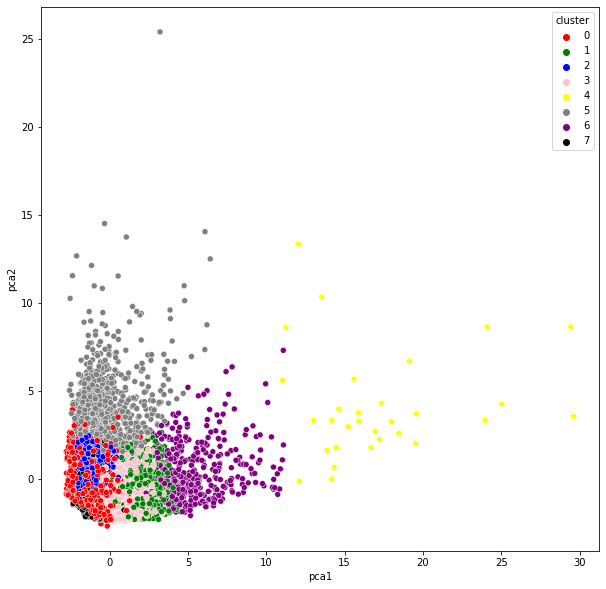

In [61]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red','green','blue','pink','yellow','gray'
, 'purple', 'black'])

# AUTOENCODERS

- Auto encoders are a type of Artificial Neutral Networks that are used to perform a task of data encoding (representation learning).
- Auto encoders use the same input data for the input and output.

In [62]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [66]:
from keras import optimizers
input_df = Input(shape = (17,))

x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform') (x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform') (x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform') (x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform') (x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [67]:
creditcard_df_scaled.shape

(8950, 17)

In [68]:
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled, batch_size = 128,epochs = 25, verbose = 1 )

Epoch 1/25
70/70 [==============================] - 6s 62ms/step - loss: 0.5975
Epoch 2/25
70/70 [==============================] - 6s 84ms/step - loss: 0.2963
Epoch 3/25
70/70 [==============================] - 7s 95ms/step - loss: 0.2069
Epoch 4/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1739
Epoch 5/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1602
Epoch 6/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1512
Epoch 7/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1411
Epoch 8/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1367
Epoch 9/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1246
Epoch 10/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1126
Epoch 11/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1088
Epoch 12/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1011
Epoch 13/25
70/70 [==================

In [69]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_16 (Dense)            (None, 7)                 126       
                                                                 
 dense_17 (Dense)            (None, 500)               4000      
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dense_19 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_20 (Dense)            (None, 10)                20010     
                                                                 
 dense_21 (Dense)            (None, 2000)              2200

In [70]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 3s 9ms/step


In [71]:
pred.shape

(8950, 10)

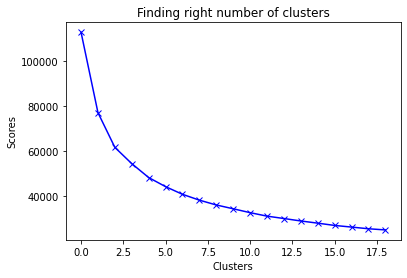

In [72]:
#optimal number of clusters
#kmeans
#pca
scores_2 = []

range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


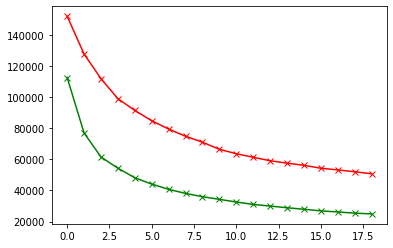

In [73]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

We can choose number of clusters = 4

In [74]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_


In [75]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [76]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1','pca2'])

In [77]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.086039,-0.074660,0
1,2.923682,2.254254,1
2,0.700432,-0.428416,2
3,-0.907015,0.347274,0
4,-1.961825,0.004641,0


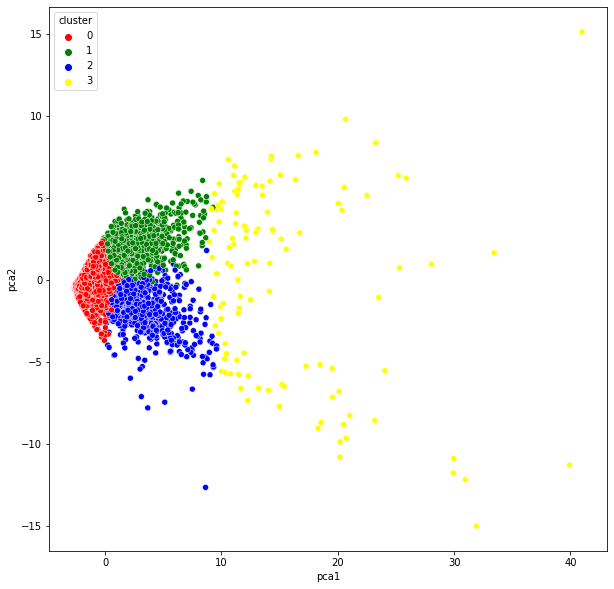

In [78]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red','green','blue','yellow'])